# Расчётно-графическая работа №4
#### Выполнил: Сухов Николай Михайлович
#### Поток: 24.4
#### Вариант: 4 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as sklearn_LR
from sklearn.metrics import r2_score
from scipy.stats import t, f

# Задание 1

In [2]:
houses_url = "https://drive.google.com/file/d/1cx0pshptDSVmaWLJCBGS9jIIJ2g-VRgT/view"
houses_url = "https://drive.google.com/uc?id=" + houses_url.split('/')[-2]
data = pd.read_csv(houses_url)
data = data.dropna()
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


##### Построим модель линейной регрессии
$$Y=Xc+с_0+\varepsilon$$
где $Y=(y_1,\dots,y_n)^T$ вектор зависимых переменных, $X=(x_{i,j})_{i\leq n,j\leq m}$ - матрица независимых переменных, $\varepsilon=(\varepsilon_1,\dots,\varepsilon_n)^T$ - случайный вектор ошибок, $c=(c_1,\dots,c_m)^T$ - вектор коэффициентов (неизвестный), $c_0=(с_1,\dots,c_n)^T$ -вектор свободных коэффициентов.

Предполагая нормальность распределения ошибок, гомоскедастичность остаточной дисперсии и некоррелированность компонент: $$\text{E}(\varepsilon)=0, \quad \text{Var}(\varepsilon)=\sigma^2I,\quad\varepsilon\sim \mathcal{N}(0,\sigma^2I_n)\quad\text{Cov}(\varepsilon_i, \varepsilon_j=0)$$
Оценка коэффмциентов методом наименьших квадратов:
$$\hat{c}=A^{-1}X^TY,\quad A=X^TX\Rightarrow\hat{c}=(X^TX)^{-1}X^TY$$
В данном случае, $X$ - матрица регрессоров с добавленным столбцом из единиц для свободного члена.

Оценка остаточной дисперсии:
$$\hat{\sigma}^2=\frac{S^2(\hat{c})}{n-m},\quad S^2(c)=\varepsilon^T\varepsilon,\quad\varepsilon=y-\hat{y}\Rightarrow\hat{\sigma}^2=\frac{(y-\hat{y})^T(y-\hat{y})}{n-m}$$
Построим модель:

In [3]:
class LinearRegression():
    def __init__(self):
        self._coef = None
        self.fitted = False
        self._X = None
        self._y = None

    def fit(self, X, y):
        X = np.asarray(X)
        self._X = np.hstack((np.ones((X.shape[0], 1)), X))
        self._y = np.asarray(y)
        self._coef = np.linalg.inv(self._X.T @ self._X) @ self._X.T @ self._y
        self.fitted = True

    def predict(self, X):
        if self.fitted:
            X = np.asarray(X)
            X = np.hstack((np.ones((X.shape[0], 1)), X))
            return X @ self._coef
        else: return None
    
    def residual_variance(self, X, y):
        y_pred = self.predict(X)
        y = np.asarray(y)
        residuals = y - y_pred
        sigma2 = residuals.T @ residuals / (y.size - self._coef.size)
        return sigma2
    
    def get_residuals(self, X, y):
        y_pred = self.predict(X)
        y = np.asarray(y)
        residuals = y - y_pred
        return residuals

    def get_coefs(self):
        return self._coef[1:]

    def get_free_coef(self):
        return self._coef[0]
    
    def confidence_intervals(self, alpha=0.05):
        if not self.fitted:
            return None

        n, m = self._X.shape  
        A_inv = np.linalg.inv(self._X.T @ self._X)
        sigma2 = self.residual_variance(self._X[:, 1:], self._y)
        t_crit = t.ppf(1 - alpha / 2, df=n - m)

        intervals = []
        for i in range(m):
            coef = self._coef[i]
            se = np.sqrt(sigma2 * A_inv[i, i])
            lower = coef - t_crit * se
            upper = coef + t_crit * se
            intervals.append((coef, lower, upper))

        return intervals

Вычислим оценки коэффициентов

In [4]:
X = np.asarray([data["sqft_living"], data["sqft_lot"], data["sqft_above"]]).T
y = data["price"].values
model = LinearRegression()
model.fit(X, y)
print(f"Коэффициенты: {model.get_coefs()}\nСвободный коэффициент: {model.get_free_coef()}")

Коэффициенты: [ 2.96151642e+02 -2.78184112e-01 -1.69034311e+01]
Свободный коэффициент: -41445.123605716304


Оценим модель визуально и сравним с библиотечной версией

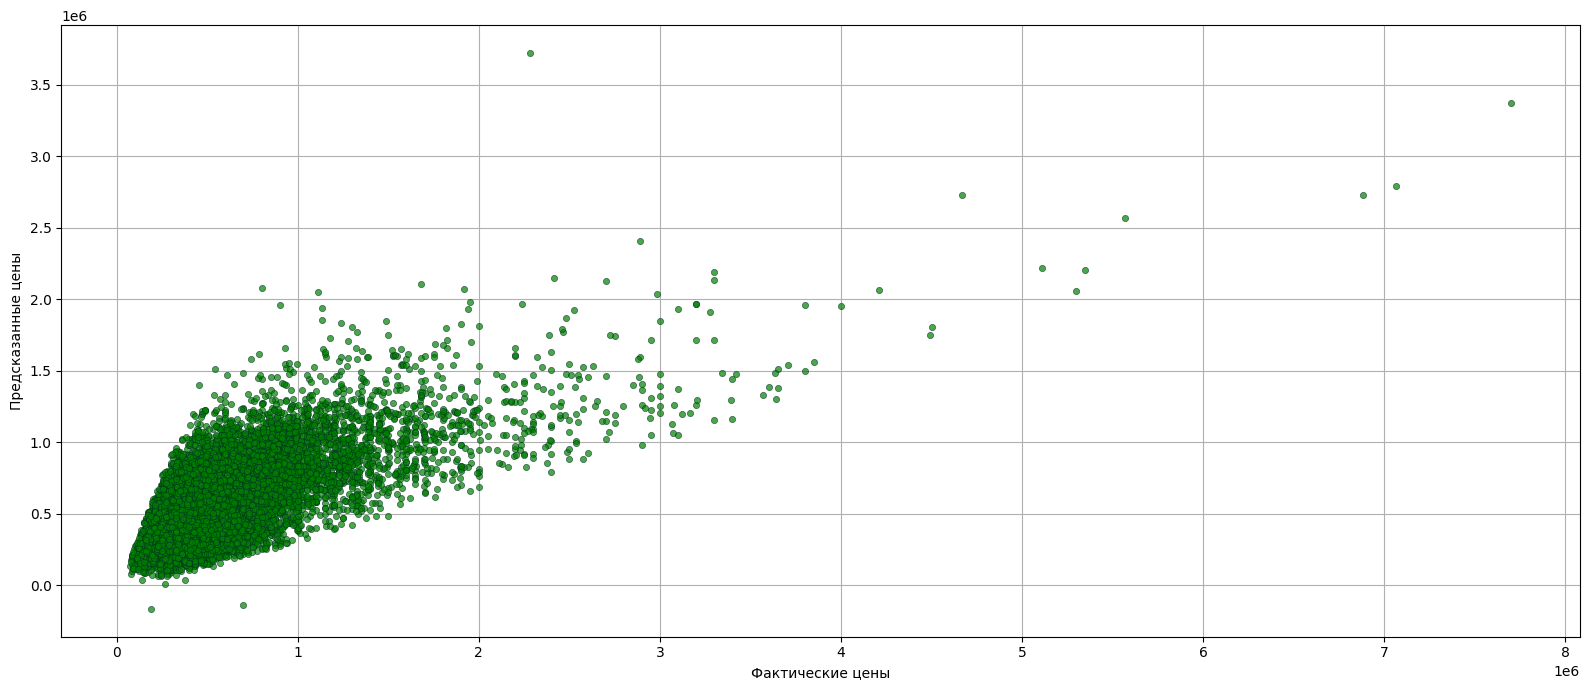

In [5]:
y_pred = model.predict(X)

plt.figure(figsize=(16, 7))
plt.scatter(y, y_pred, alpha=0.7, s=20, color='green', linewidths=0.5, edgecolors='#013220')
plt.xlabel("Фактические цены")
plt.ylabel("Предсказанные цены")
plt.gca().set_axisbelow(True) 
plt.grid(True)
plt.tight_layout()
plt.show()

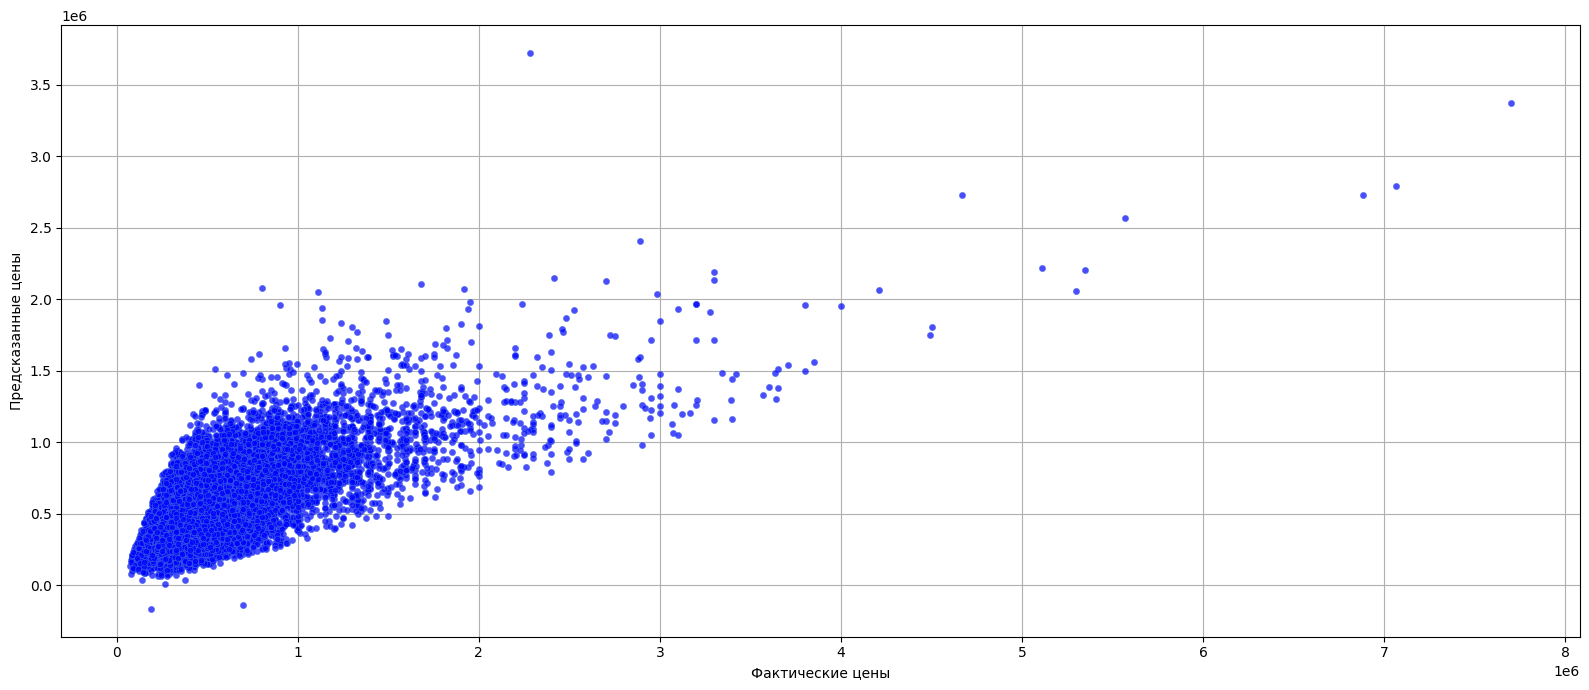

In [6]:
sk_model = sklearn_LR()
sk_model.fit(X, y)
sk_y_pred = sk_model.predict(X)

plt.figure(figsize=(16, 7))
plt.scatter(y, sk_y_pred, alpha=0.7, s=20, color='blue', linewidths=0.5, edgecolors='royalblue')
plt.xlabel("Фактические цены")
plt.ylabel("Предсказанные цены")
plt.gca().set_axisbelow(True) 
plt.grid(True)
plt.tight_layout()
plt.show()

Как видим, предсказания далеко не идеальны, и обе модели очень похожи. Вероятно, объема данных или признаков не достаточно для более точного построения модели.

Теперь оценим остаточную дисперсию:

In [7]:
res_var = model.residual_variance(X, y)
print(f"Остаточная дисперсия: {res_var}")

Остаточная дисперсия: 68179410013.81135


Коэффициент детерминации вычисляется следующим образом:
$$R_2=1-\frac{RSS}{TSS}=1-\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \overline{y})^2}$$
где $RSS$ - сумма квадратов ошибок модели, $TSS$ - общая вариация исходных данных относительно их среднего

In [8]:
def R2_score(y_true, y_pred):
    RSS = np.sum((y_true - y_pred)**2)
    TSS = np.sum((y_true - np.mean(y_true))**2)
    return 1 - RSS / TSS
         
print("R²:", R2_score(y, y_pred))
print("R² (scipy):", r2_score(y, y_pred))


R²: 0.49422211775914304
R² (scipy): 0.49422211775914304


Для нашей выборки и малого количества признаков, довольно стандартный результат

Теперь построим доверительные интервалы.

По следствию из основной теореме о линейной регресии, доверительный интервал:
$$\left( \hat{c}_i - c_i \right) \sqrt{ \frac{n - m}{A^{-1}_{ii} S^2(\hat{c})} } \sim T(n - m),\quad
\hat{c}_i \pm t_{1 - \alpha/2}(n - m) \cdot \sqrt{A^{-1}_{ii} \cdot S^2(\hat{c})}
$$
где
  - $\hat{c}_i$ — оценка коэффициента $c_i$
  - $t_{1 - \alpha/2}(n - m)$ — критическое значение t-распределения с $n - m$ степенями свободы
  - $A = X^T X$
  - $S^2(\hat{c})$ — оценка остаточной дисперсии (MSE)
  - $n$ — количество наблюдений
  - $m$ — количество признаков (без учёта свободного члена)


In [9]:
intervals = model.confidence_intervals()

for i, (coef, lower, upper) in enumerate(intervals):
    name = "Свободный член" if i == 0 else f"x{i}"
    print(f"{name}: {coef:.2f} ∈ [{lower:.2f}, {upper:.2f}]")

Свободный член: -41445.12 ∈ [-50157.31, -32732.94]
x1: 296.15 ∈ [288.27, 304.03]
x2: -0.28 ∈ [-0.36, -0.19]
x3: -16.90 ∈ [-25.66, -8.15]


#### Проверка гипотез
##### 1 Чем больше жилая площадь, тем больше цена
$$H_0: \text{Чем больше жилая площадь, тем больше цена}$$
$$H_1: \text{Большая жилая площадь, не означет большую цену}$$
Воспользуемся t-критерием Стьюдента:
$$t_j = \frac{\hat{c}_j}{\sqrt{\hat{\sigma}^2 \cdot (X^T X)^{-1}_{jj}}} - \text{t-статистика}$$
$$\hat{\sigma}^2 = \frac{1}{n - m} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 - \text{Оценка остаточной дисперсии}$$
$$\hat{c}_j - \text{оценка коэффициента из модели}$$

In [10]:
t_stat = model.get_coefs()[0] / np.sqrt(model.residual_variance(X, y) * np.linalg.inv(X.T @ X)[0, 0])
n, m = np.shape(X)
t_crit = t.ppf(0.95, df=n - m)

print("t-статистика:", t_stat)
print("Критическое значение:", t_crit)

if t_stat < t_crit:
    print("H0 отвергается: жилая площадь НЕ увеличивает цену")
else:
    print("H0 не отвергается: жилая площадь увеличивает цену")

t-статистика: 77.45833372732376
Критическое значение: 1.6449241422161363
H0 не отвергается: жилая площадь увеличивает цену


Как видим, значение площади довольно сильно вляиет на цену. Гипотеза подтверждена.
##### 2 Цена зависит от "sqft_lot"
$$H_0: \text{Цена зависит от "sqft\_lot"}$$
$$H_1: \text{Цена не зависит от "sqft\_lot"}$$

In [11]:
t_stat = model.get_coefs()[1] / np.sqrt(model.residual_variance(X, y) * np.linalg.inv(X.T @ X)[1, 1])
n, m = np.shape(X)
t_crit = t.ppf(0.05, df=n - m)

print("t-статистика:", t_stat)
print("Критическое значение:", t_crit)

if t_stat < t_crit:
    print("H0 отвергается: цена не зависит от \"sqft_lot\"")
else:
    print("H0 не отвергается: цена зависит от \"sqft_lot\"")

t-статистика: -6.376518743707801
Критическое значение: -1.644924142216137
H0 отвергается: цена не зависит от "sqft_lot"


Цена не зависит от "sqft_lot", гипотеза отвергается.
##### 3 Коэффициенты при жилой площади и "sqft\_above" равны нулю одновременно
$$H_0: \text{Коэффициенты при жилой площади и "sqft\_above" равны нулю одновременно}$$
$$H_1: \overline{H_0}$$
Воспользуемся f-тестом:
$$
F = \frac{(RSS_0 - RSS)/q}{RSS / (n - m')}
$$

Где
- $RSS$ — сумма квадратов ошибок модели
- $RSS_{0}$ — сумма квадратов ошибок модели с нулевыми выбранными коэффициентами
- $q$ — число проверяемых ограничений (в данном случае: 2)
- $n$ — количество наблюдений
- $m'$ — количество коэффициентов модели (включая свободный член)

In [12]:
X_0 = np.asarray([data["sqft_lot"]]).T
model_0 = LinearRegression()
model_0.fit(X_0, y)
RSS = np.sum(model.get_residuals(X, y) ** 2)
RSS_0 = np.sum(model_0.get_residuals(X_0, y) ** 2)

n = len(y)
m = X.shape[1] + 1
q = 2

F = ((RSS_0 - RSS) / q) / (RSS_0 / (n - m))
F_crit = f.ppf(0.95, dfn=q, dfd=n - m)

print(f"f-статистика: {F}")
print(f"Критическое значение F: {F_crit}")

if F > F_crit:
    print("H0 отвергается")
else:
    print("H0 не отвергается")


f-статистика: 5295.535923927629
Критическое значение F: 2.996147620934229
H0 отвергается


Гипотеза отвергается. Закономерно предположить - так как коэффициент при жилой площади значим.
# Задание 2
Гипотеза:

$$
\begin{cases}
H_0: \mu_1 = \mu_2 = \cdots = \mu_k, & \text{(средние равны)} \\
H_1: \exists i,j: \mu_i \neq \mu_j, & \text{(хотя бы два средних различны)}
\end{cases}
$$

Пусть $y_{ij}$— наблюдение $j$-го элемента в группе $i$, где

- $i = 1, \ldots, k$ — номер группы,
- $j = 1, \ldots, n_i$ — номер наблюдения в группе,
- $N = \sum_{i=1}^k n_i$ — общее число наблюдений.

Среднее по группе $i$:
$\quad
\bar{y}_i = \frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij},\quad
$
Общее среднее по всем наблюдениям:
$\quad
\bar{y} = \frac{1}{N} \sum_{i=1}^k \sum_{j=1}^{n_i} y_{ij}
$


Межгрупповая сумма квадратов:

$$
SS_{\text{bg}} = \sum_{i=1}^k n_i (\bar{y}_i - \bar{y})^2
$$

Внутригрупповая сумма квадратов:

$$
SS_{\text{wg}} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_i)^2
$$

Степени свободы:

$$
\text{d}f_{\text{bg}} = k - 1, \quad \text{d}f_{\text{wg}} = N - k
$$


F-статистика:

$$
F = \frac{SS_{\text{bg}}/\text{d}f_{\text{bg}}}{SS_{\text{wg}}/\text{d}f_{\text{wg}}}
$$


In [13]:
iris_url = "https://drive.google.com/file/d/1CSCheMzjberRwgcf90BBu-J6uxMg-Qf7/view"
iris_url = "https://drive.google.com/uc?id=" + iris_url.split('/')[-2]
iris_data = pd.read_csv(iris_url)
iris_data = iris_data.dropna()
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris_data.insert(4, "Area", iris_data["Sepal.Length"] * iris_data["Sepal.Width"] + iris_data["Petal.Length"] * iris_data["Petal.Width"])
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Area,Species
0,5.1,3.5,1.4,0.2,18.13,setosa
1,4.9,3.0,1.4,0.2,14.98,setosa
2,4.7,3.2,1.3,0.2,15.30,setosa
3,4.6,3.1,1.5,0.2,14.56,setosa
4,5.0,3.6,1.4,0.2,18.28,setosa


In [15]:
groups = iris_data.groupby("Species")["Area"].apply(np.array)

k = len(groups)
N = iris_data.shape[0]

means = groups.apply(np.mean)
all_mean = iris_data["Area"].mean()

SS_bg = sum(len(g) * (mean - all_mean)**2 for g, mean in zip(groups, means))
SS_wg = sum(sum((x - mean)**2 for x in g) for g, mean in zip(groups, means))

df_bg = k - 1
df_wg = N - k

F_stat = (SS_bg / df_bg) / (SS_wg / df_wg)
F_crit = f.ppf(0.95, df_bg, df_wg)

print(f"F-статистика: {F_stat}")
print(f"Критическое значение: {F_crit}")

if F_stat > F_crit:
    print("Отвергаем H0: средние площади различаются между подвидами.")
else:
    print("Нет отвергаем H0: средние площади равны между подвидами.")


F-статистика: 133.29723648348488
Критическое значение: 3.057620651649394
Отвергаем H0: средние площади различаются между подвидами.


Гипотеза отвергнута.